# MARKET BASKET ANALYSIS

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
#reading the dataset
df=pd.read_csv('online_retail.csv')

C:\Users\Nikhar M Singh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [36]:
#showing top twenty records
df.head(20) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom


In [37]:
df.shape

(532619, 8)

In [38]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532619 non-null  object 
 1   StockCode    532619 non-null  object 
 2   Description  531165 non-null  object 
 3   Quantity     532619 non-null  int64  
 4   InvoiceDate  532619 non-null  object 
 5   UnitPrice    532619 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532619 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [39]:
#checking the values for different country in dataset
df['Country'].value_counts()

United Kingdom          487620
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [40]:
top_10_transaction = pd.DataFrame(df.groupby('Country').nunique().sort_values('InvoiceNo',ascending=False).head(10)['InvoiceNo'])
top_10_transaction

,InvoiceNo
Country,
United Kingdom,20122
Germany,457
France,392
EIRE,288
Belgium,98
Netherlands,95
Spain,90
Portugal,58
Australia,57


In [41]:
#Import plotly.express libraries for visualization
import plotly.express as px

segments=top_10_transaction

# pie plot
fig = px.pie(segments,
             values=top_10_transaction['InvoiceNo'],
             names=top_10_transaction.index,
             title="Country Performance by Number of Invoice",
             template="seaborn",
             width=600,
             height=600)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

Most of the transaction has been done from the country UK (92%),and then Germany (2%) 

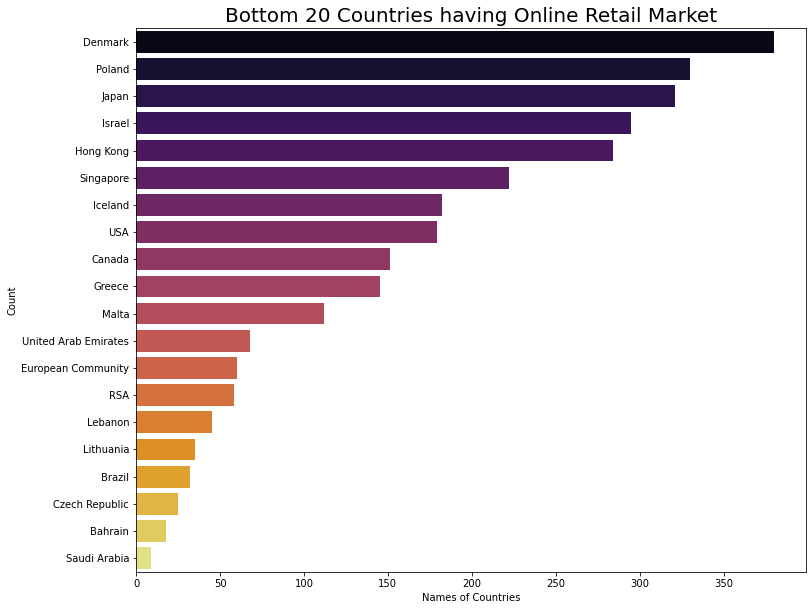

In [42]:
# checking the different values for country in the dataset 

plt.rcParams['figure.figsize'] = (12, 10)
a = df['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [43]:
# checking how many quantity of products have been sold online from each country

a = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)

Country
Netherlands             200937
EIRE                    147447
Germany                 119263
France                  112104
Australia                84209
Sweden                   36083
Switzerland              30630
Spain                    27951
Japan                    26016
Belgium                  23237
Norway                   19338
Portugal                 16258
Finland                  10704
Channel Islands           9491
Denmark                   8235
Italy                     8112
Cyprus                    6361
Singapore                 5241
Austria                   4881
Hong Kong                 4773
Israel                    4409
Poland                    3684
Unspecified               3300
Canada                    2763
USA                       2458
Iceland                   2458
Greece                    1557
United Arab Emirates       982
Malta                      970
Czech Republic             671
Lithuania                  652
European Community         499


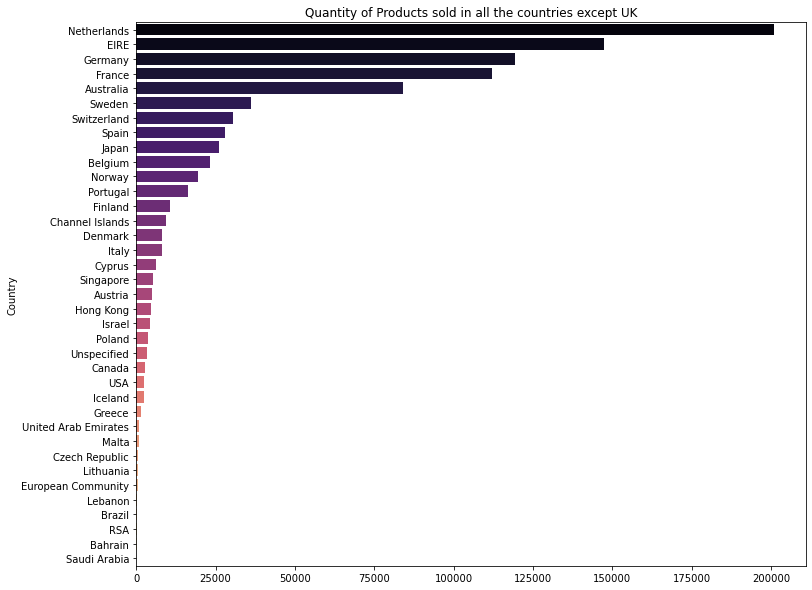

In [44]:
sns.barplot(x = a.values, y = a.index, palette = 'magma')
plt.title('Quantity of Products sold in all the countries except UK')
plt.show()

In [45]:
#adding a sales column in dataset
df['Sales'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [46]:
#now taking look at sales of each country except UK

a = df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:]
print(a)

Country
Netherlands             285446.34
EIRE                    283453.96
Germany                 228867.14
France                  209715.11
Australia               138521.31
Spain                    61577.11
Switzerland              57089.90
Belgium                  41196.34
Sweden                   38378.33
Japan                    37416.37
Norway                   36165.44
Portugal                 33747.10
Finland                  22546.08
Singapore                21279.29
Channel Islands          20450.44
Denmark                  18955.34
Italy                    17483.24
Hong Kong                15691.80
Cyprus                   13590.38
Austria                  10198.68
Israel                    8135.26
Poland                    7334.65
Greece                    4760.52
Unspecified               4749.79
Iceland                   4310.00
Canada                    3666.38
USA                       3580.39
Malta                     2725.59
United Arab Emirates      1902.28
Lebano

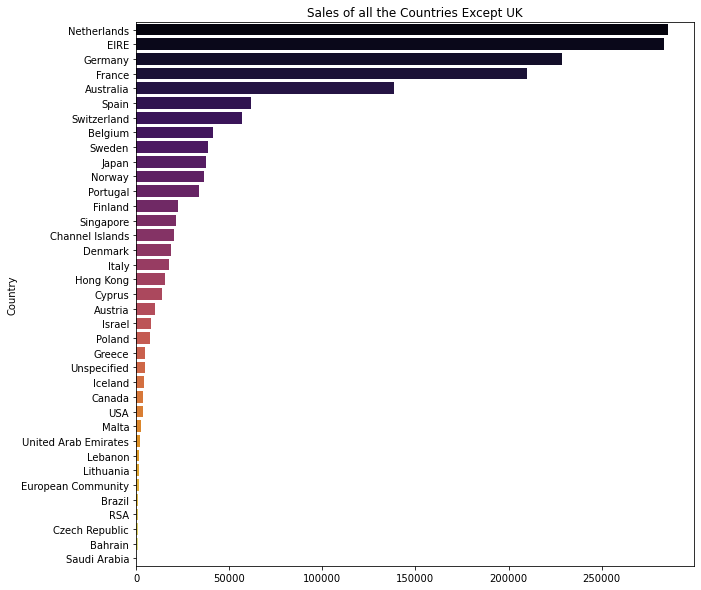

In [47]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Sales of all the Countries Except UK')
plt.show()

In [48]:
# checking how many unique customer IDs are there

x = df['CustomerID'].nunique()
print("There are {} number of different customers".format(x))

There are 4339 number of different customers


In [49]:
# checking different number of unique countries present in this dataset

x = df['Country'].nunique()
print("There are {} number of different countries who do online retailing from UK".format(x))

There are 38 number of different countries who do online retailing from UK


In [50]:
# sorting the dataset by sales amount

df.sort_values(by = 'Sales')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
294522,A563186,B,Adjust bad debt,1,12/08/2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
294523,A563187,B,Adjust bad debt,1,12/08/2011 14:52,-11062.06,NaN,United Kingdom,-11062.06
40798,539856,21116,OWL DOORSTOP,1,22/12/2010 14:41,0.00,NaN,United Kingdom,0.00
325066,565938,23066,NaN,-13,8/09/2011 10:54,0.00,NaN,United Kingdom,-0.00
140178,548646,21472,NaN,-140,1/04/2011 13:15,0.00,NaN,United Kingdom,-0.00
...,...,...,...,...,...,...,...,...,...
294521,A563185,B,Adjust bad debt,1,12/08/2011 14:50,11062.06,NaN,United Kingdom,11062.06
14839,537632,AMAZONFEE,AMAZON FEE,1,7/12/2010 15:08,13541.33,NaN,United Kingdom,13541.33
218664,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,10/06/2011 15:28,649.50,15098.0,United Kingdom,38970.00
60580,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18/01/2011 10:01,1.04,12346.0,United Kingdom,77183.60


In [51]:
# sorting the datset by unit price

df.sort_values(by = 'UnitPrice', ascending = False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
14839,537632,AMAZONFEE,AMAZON FEE,1,7/12/2010 15:08,13541.33,NaN,United Kingdom,13541.33
294521,A563185,B,Adjust bad debt,1,12/08/2011 14:50,11062.06,NaN,United Kingdom,11062.06
170180,551697,POST,POSTAGE,1,3/05/2011 13:46,8142.75,16029.0,United Kingdom,8142.75
292286,562955,DOT,DOTCOM POSTAGE,1,11/08/2011 10:14,4505.17,NaN,United Kingdom,4505.17
263194,560373,M,Manual,1,18/07/2011 12:30,4287.63,NaN,United Kingdom,4287.63
414584,573080,M,Manual,1,27/10/2011 14:20,4161.06,12536.0,France,4161.06
414560,573077,M,Manual,1,27/10/2011 14:13,4161.06,12536.0,France,4161.06
398897,571751,M,Manual,1,19/10/2011 11:18,3949.32,12744.0,Singapore,3949.32
367877,569382,M,Manual,1,3/10/2011 16:44,3155.95,15502.0,United Kingdom,3155.95
341714,567353,M,Manual,1,19/09/2011 16:14,2653.95,NaN,Hong Kong,2653.95


# DATASET CLEANING

In [52]:
# Stripping extra spaces in the description 
df['Description'] = df['Description'].str.strip() 

In [53]:
# Dropping the rows without any invoice number 
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [54]:
# Dropping all transactions which were done on credit 
df = df[~df['InvoiceNo'].str.contains('C')]

In [55]:
df['Country'].value_counts()

United Kingdom          487620
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [56]:
df.shape

(532619, 9)

In [57]:
#Splitting the data according to the region of transaction

# Transactions done in the United Kingdom 
basket_UK = (df[df['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [58]:
basket_UK.head(20)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [60]:
basket_encode = basket_UK.applymap(encode_units)
basket_encode

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#flitering the basket for more than 1 item in basket
basket_filter = basket_encode[(basket_encode > 0).sum(axis=1) >= 2]
basket_filter

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we could see that there are 16539 transaction that bought more than 1 items.It means, 88.60 % of the basket data is a transaction that is bought more than 1 item.

In [62]:
basket_frequent = apriori(basket_filter, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

basket_frequent['Frequency'] = basket_frequent['itemsets'].apply(lambda x: len(x))

basket_frequent

,support,itemsets,Frequency
0,0.129875,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.116331,(JUMBO BAG RED RETROSPOT),1
2,0.100671,(REGENCY CAKESTAND 3 TIER),1
3,0.095471,(PARTY BUNTING),1
4,0.084165,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
173,0.030473,(CHRISTMAS CRAFT LITTLE FRIENDS),1
174,0.030413,"(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE)",2
175,0.030292,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR...",2
176,0.030171,"(LUNCH BAG SUKI DESIGN, LUNCH BAG BLACK SKULL.)",2


As you can see that there are 178 transaction that is consider as a frequently bought items. It is shown in the picture that White hanging Heart T-Light Holder is the most frequently bought items with the support value of 0.129875.

In [63]:
basket_frequent[ (basket_frequent['Frequency']  == 2) &
                        (basket_frequent['support'] >= 0.03) ]

,support,itemsets,Frequency
54,0.047464,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",2
71,0.042385,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",2
74,0.042203,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",2
87,0.039724,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",2
108,0.036701,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",2
121,0.034887,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",2
126,0.034464,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",2
129,0.034041,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2
132,0.033497,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
138,0.033013,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",2


In [64]:
association_rules(basket_frequent, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.056473,0.042264,0.034887,0.617773,14.617093,0.032500,2.505674
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042264,0.056473,0.034887,0.825465,14.617093,0.032500,5.405948
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.042264,0.057682,0.033013,0.781116,13.541798,0.030575,4.305101
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.057682,0.042264,0.033013,0.572327,13.541798,0.030575,2.239413
4,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.054235,0.045287,0.032711,0.603122,13.317793,0.030254,2.405555
5,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.045287,0.054235,0.032711,0.722296,13.317793,0.030254,3.405662
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.057682,0.056473,0.042385,0.734801,13.011639,0.039127,3.557807
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.056473,0.057682,0.042385,0.750535,13.011639,0.039127,3.777361
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.052663,0.056170,0.034041,0.646383,11.507574,0.031083,2.669077
9,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.056170,0.052663,0.034041,0.606028,11.507574,0.031083,2.404578


From the association_rules results above, we could see that PINK REGENCY TEACUP AND SAUCER & GREEN REGENCY TEACUP AND SAUCER are the items that has the highest association each other since these two items has the highest “lift” value.

### The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated

In thise case, the highest value is 14.617 which is very high. It means these 2 items are very good to be sold together

# CONCLUSION

from the above analysis we can see that the two highest lift products we got and many other are also there,that are-

1. PINK REGENCY TEACUP AND SAUCER & GREEN REGENCY TEACUP AND SAUCER
2. PINK REGENCY TEACUP AND SAUCER & ROSES REGENCY TEACUP AND SAUCER
3. GARDENERS KNEELING PAD KEEP CALM & GARDENERS KNEELING PAD CUP OF TEA
4. ALARM CLOCK BAKELIKE GREEN & ALARM CLOCK BAKELIKE RED	

After done a Market Basket analysis on Online retail transaction data from UK.Following insights can be made:

1. we could put above these productstogether in a same place,so that people could easily see and buy it

2. we can do also make combo of these product,to sell as a whole.